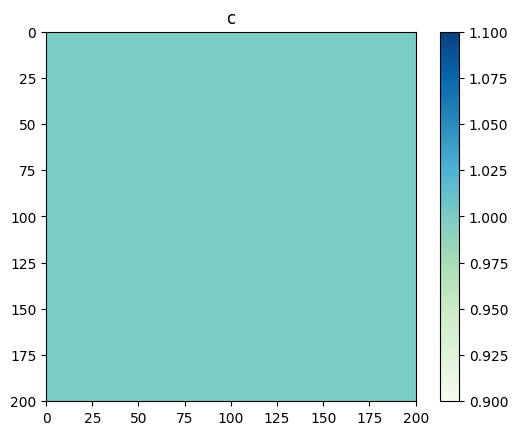

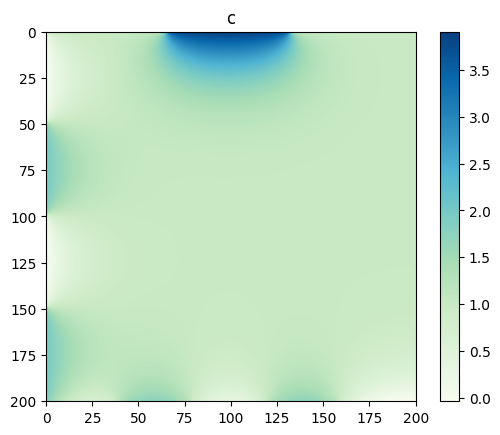

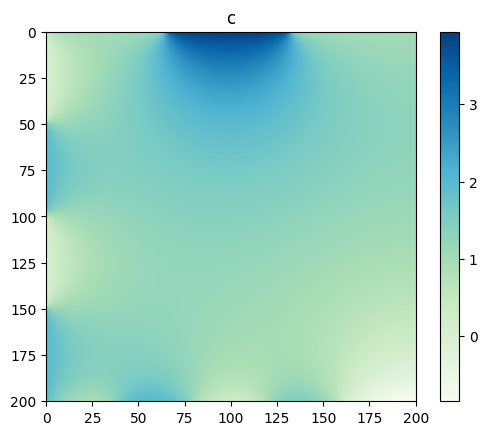

In [12]:
import pyphasefield.Engines as engines

sim = engines.Diffusion(dimensions=[200, 200])

#initialize non-array parameters
sim.set_framework("CPU_SERIAL") #"CPU_SERIAL", "GPU_SERIAL" (GPU_SERIAL requires numba)
sim.set_dx(1.)
sim.set_dt(0.2)
sim.set_save_path("data/boundary_conditions_test")
sim.set_autosave_flag(False)
sim.set_boundary_conditions([["DIRICHLET", "NEUMANN"], ["DIRICHLET", "NEUMANN"]])

data = {
    "D":1.
}
sim.set_user_data(data)

#initialize simulation arrays, all parameter changes should be BEFORE this point!
sim.initialize_engine()

#change array data here, for custom simulations

#set the field values manually using numpy slicing, setting it to one everywhere
sim.fields[0].data[:] = 1.

#set the boundary fields!
#X-axis Dirichlet, commented lines are default behavior
#sim.boundary_fields[0].data[:50, 0] = 0.
sim.boundary_fields[0].data[50:100, 0] = 2.
#sim.boundary_fields[0].data[100:150, 0] = 0.
sim.boundary_fields[0].data[150:, 0] = 2.

#Y-axis Dirichlet
sim.boundary_fields[0].data[0, :66] = 1.
sim.boundary_fields[0].data[0, 133:] = 1.
sim.boundary_fields[0].data[0, 66:133] = 4.

#Neumann X-axis has no change, equivalent to the bottom line
#sim.boundary_fields[0].data[:, -1] = 0.

#Neumann Y-axis
sim.boundary_fields[0].data[-1, :40] = 0.05
sim.boundary_fields[0].data[-1, 40:80] = -0.05
sim.boundary_fields[0].data[-1, 80:120] = 0.05
sim.boundary_fields[0].data[-1, 120:160] = -0.05
sim.boundary_fields[0].data[-1, 160:] = 0.05

#initial conditions
sim.plot_simulation()

#run simulation
sim.simulate(2000)

#final conditions
sim.plot_simulation()

#run simulation
sim.simulate(48000)

#final conditions
sim.plot_simulation()